<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/SGD(%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBC 마켓의 럭키백 성공에 힘입어 각 지역에서 수산물 제공하기로 함.

영업팀은 매주 7개의 생선 중 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있게 훈련데이터를 제공함.

하지만,수산물을 제공한다는 지역이 너무 많아 샘플을 골라내는 일이 너무 힘드며, 추가되는 수산물의 샘플도 없음

영업팀은 새로운 생선이 도착하는대로 가능한 즉시 훈련데이터를 제공할 예정.

# 점진적학습

1. 당면문제 : 훈련데이터가 한번에 준비되는 것이 아니라, 조금씩 전달됨

2. 해결방법 - 1
- 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매일 다시 훈련

- 단점 : 시간이 지날수록 데이터 증가 및 이에따른 인력보강, 서버증설, 시간적 여유 감소 -> 지속가능성 감소

3. 해결방법 - 2
- 새로운 데이터를 추가할 때 마다 이전 데이터를 버림, 훈련데이터 크기를 일정하게 유지
- 단점 : 데이터 소거 시 다른 데이터에 없는 중요데이터가 포함될 가능성 상존

4. 해결방법 - 3
- 점진적 학습방법(온라인 학습 / 훈련한 모델을 버리지 않고 조금씩 새로운 데이터를 학습) -> 확률절 경사 하강법(Stochastic Gradient Descent / SGD)

In [ ]:
# 확률적 경사 하강법(산에서 내려오는 것 처럼 가파른 길을 찾아 천천히 조금씩 내려오는 기법)
# 확률적 : 무작위, 랜덤(훈련 세트에서 랜덤하게 하나의 샘플을 고름)
# 경사 : 기울기 / 하강 : 내려오는 것
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려감
# 위 방법을 반복수행하며, 만약 모든 샘플을 다 사용해도 다 내려오지 못하는 경우 처음부터 다시 시작함
# 훈련세트에 모든 샘플을 다시 채워 넣어 다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감
# 만족할만한 위치에 도달할 때까지 계속 내려감
# 훈련세트를 한반 모두 사용하는 과정을 epoch(에포크)라고 함
# 일반적인 경사하강법은 수십, 수백번이상 epoch를 수행

In [ ]:
# 예시
# 등산 시 산에서 내려온다고 가정, 집으로 돌아가려면 등산로 입구까지 내려가야함.
# 만약 어떤 산길도 척척내려갈 수 있는 초능력이 있다면 가장 빠른 루트을 선택하는 것이 최선이나, 가장 빠른 루트는 가장 가파른 길임
# 실제 산에서 내려올 시 천천히 조금씩 내려와야함. -> 경사 하강법
# 가장 가파른 루트를 찾아 내려오지만 조금씩 내려오는 것이 중요함 -> 훈련법
# 훈련 세트를 사용하여 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 루트를 찾음
# 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 루트를 찾음 -> 확률적
# 결론 : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려간 후 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감 -> 전체 샘플을 모두 사용할 때 까지 진행

In [ ]:
# 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있으며, 잘못된 훈련으로 결과가 나오면 돌아갈 수 없음
# 이러한 문제점을 해소하려고 무작위로 몇개의 샘플을 선택하여 경사를 내려가는 방법을 미니 배치 경사하강법이라 함
# 미니 배치 경사 하강법(mini-Batch Gradient Descent) : 여러개의 샘플을 사용하여 경사하강진행
# 배치 경사하강법(Batch Gradient Descent / BGD) : 극단적으로 한번 경사로를 따라 이동(전체 샘플사용)함
    # 단점 : 컴퓨터 리소스를 너무 많이 사용
    # 한번에 전체 데이터를 모두 읽을 수 없을 가능성 상존
# 확률적 경사 하강법은 훈련세트를 시용하여 산 아래에 있는 최적의 장소로 조금씩 이동
# 이때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 이어나갈 수 있으므로 다시 산꼭대기부터 시작할 필요가 없음 -> 신경망 알고리즘을 사용

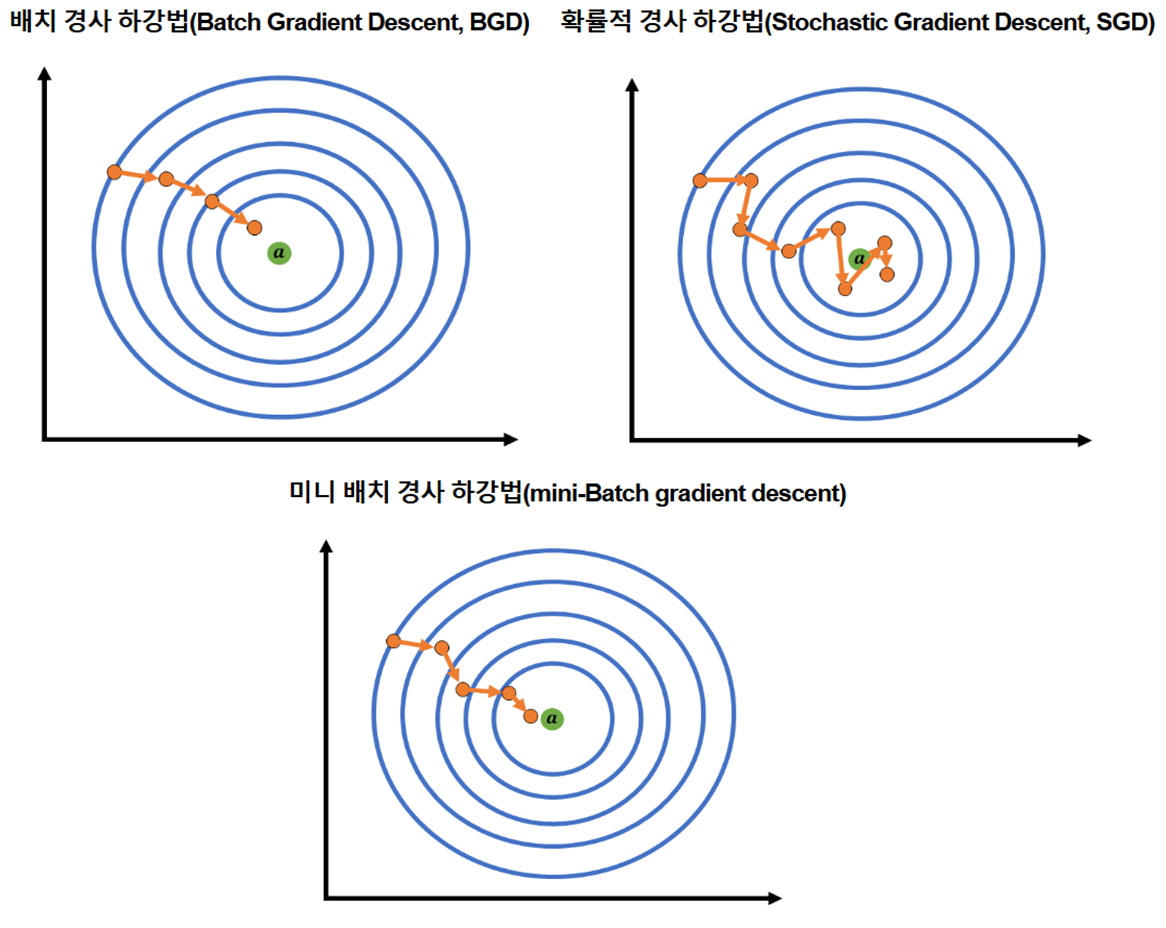

In [ ]:
# 손실함수(Loss Function) : 머신런닝이 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을수록 좋음) -> 이 값을 찾아서 조금씩 이동
# 비용함수(Cost Function) : 훈련세트에 있는 모든 샘플에 대한 손실함수의 합
# 에포크(Epoch / 시대) : 훈련세트를 한번 모두 사용하는 과정

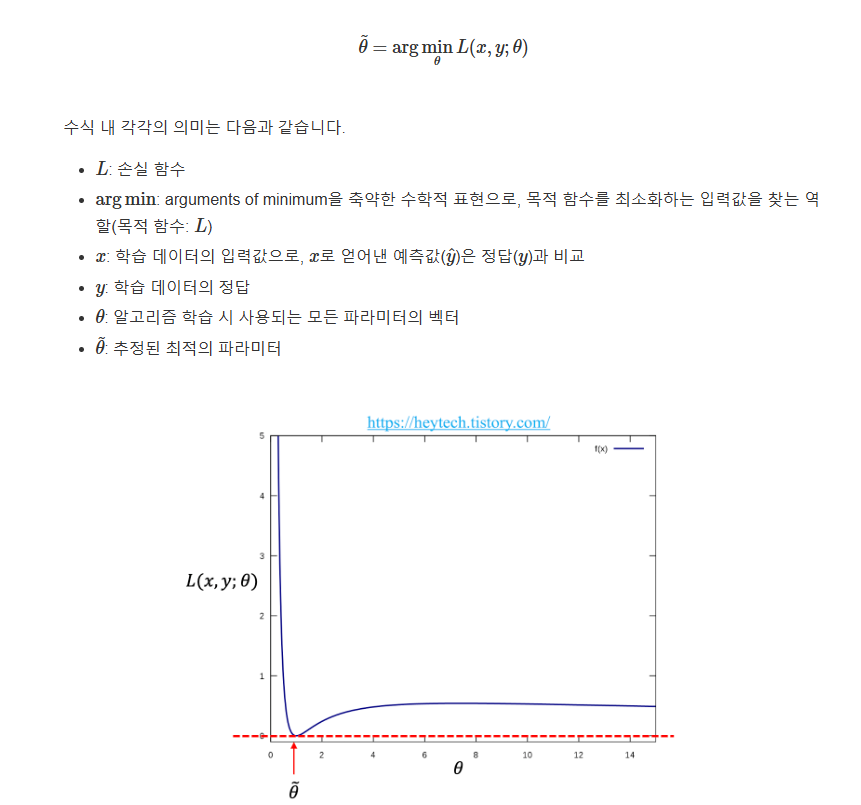

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# Species(어종)을 제외한 나머지 필드를 fish_input 변수에 리스트로 넣음
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

np.set_printoptions(precision = 6, suppress = True)

# 사이킷런을 사용하여 훈련자료와 테스트자료 분리
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)
print('train_input')
print(train_input.shape)
print('test_input')
print(test_input.shape)

train_input
(119, 5)
test_input
(40, 5)


In [14]:
print('train_input')
print(train_input[:5])
print('test_input')
print(test_input[:5])

train_input
[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
test_input
[[ 78.      18.7     19.4      5.1992   3.1234]
 [ 13.4     12.4     13.5      2.43     1.269 ]
 [200.      32.3     34.8      5.568    3.3756]
 [270.      26.      28.7      8.3804   4.2476]
 [150.      23.      24.5      5.2185   3.626 ]]


In [11]:
print('train_target')
print(train_target.shape)
print('test_target')
print(test_target.shape)

train_target
(119,)
test_target
(40,)


In [15]:
print('train_target')
print(train_target[:5])
print('test_target')
print(test_target[:5])

train_target
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']
test_target
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print('train_scaled')
print(train_scaled[:5])
print('test_scaled')
print(test_scaled[:5])

train_scaled
[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]
test_scaled
[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [29]:
from sklearn.linear_model import SGDClassifier

# SGDClassifier : 사이킷런의 확률적 경사 하강법 제공, 2개의 매개변수를 지정
# loss = 'log_loss' : 로지스틱 손실함수 지정
# max_iter = 10 : 10회 에포크 반복(전체 훈련세트 10회 반복)
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)    # 이경우 33회 미만은 학습횟수가 적어 적절한 확률계산이 불가하여 오류가 발생하나, 33회 이상 반복은 무의미함(비슷한 값 출력됨)
sc.fit(train_scaled, train_target)    # 학습 시작

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))    # train < test 이기 때문에 과소적합 / iter_max 값을 높여 학습횟수를 늘리면 해결됨

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [31]:
# 확률적 경사 하강법은 점진적 학습이 가능함
# SGDClassifier 객체를 또 만들지 않고 훈련할 모델을 sc로 추가하여 훈련 추가
sc.partial_fit(train_scaled, train_target)    # 부분적(partial) 학습

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 위 경우 첫 계산보다는 정확도가 증가하나, 무작정 부분적인 학습을 계속하는 것은 의미가 없고 기준점을 제공해야함 -> 현재는 산에서 내려오다가 정체된 느낌

0.7815126050420168
0.8


In [ ]:
# 에포크와 과대/과소적합
# 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소/과대적합이 될 수 있음
# 에포크 횟수가 적으면 훈련세트를 덜 학습함(119개에서 10번만 랜덤추출하고 정지)
# 에포크 횟수가 충분히 많으면 훈련세트를 완전 학습할 것으로 예상됨

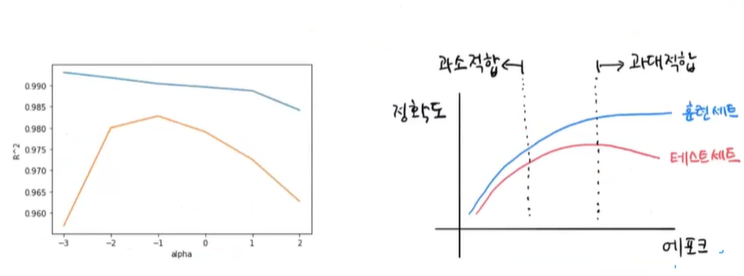

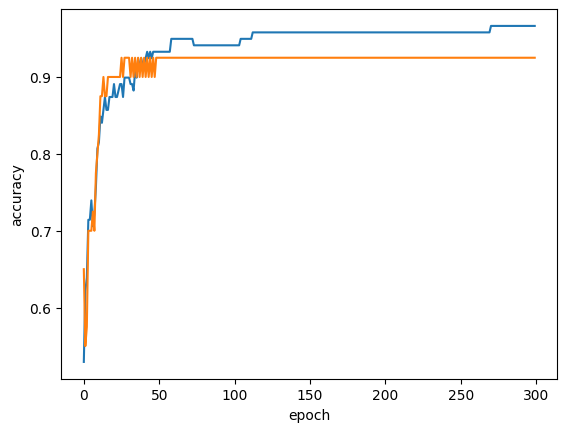

In [37]:
# 적은 에포크 횟수로 훈련된 모델은 훈련세트와 테스트세트에 맞지 않음(과소적함)
# 많은 에포크 횟수로 훈련된 모델은 너무 잘맞아 테스트세트에는 오히려 점수가 떨어짐(과대적합)
# 조기종료 : 과대적합이 되기 전에 훈련 종료

import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state = 42)
train_score = []    # 훈련세트 점수를 누적하는 빈 리스트
test_score = []    # 테스트세트 점수를 누적하는 빈 리스트
# train_target에 있는 7개의 생선목록 제공
classes = np.unique(train_target)

for _ in range(0, 300):    # 300번의 에포크 동안 훈련 진행
    sc.partial_fit(train_scaled, train_target, classes = classes)    # partial_fit : 훈련을 부분적으로 추가
    # 반복마다 훈련세트와 테스트세트의 점수를 계산하여 score 리스트에 추가
    train_score.append(sc.score(train_scaled, train_target))    # 훈련세트 점수를 빈 리스트에 추가
    test_score.append(sc.score(test_scaled, test_target))    # 테스트세트 점수를 빈 리스트에 추가

import matplotlib.pyplot as plt

plt.plot(train_score)    # 훈련세트 점수 / 파란색
plt.plot(test_score)    # 테스트세트 점수 / 주황색
plt.xlabel('epoch')    # 에포크 횟수
plt.ylabel('accuracy')    # 정확도
plt.show()

In [39]:
# 결론 : 에포크 횟수가 100회 근처일 경우 차트 상 과대 및 과소적합 상태가 아닌 최상의 상태로 출력됨

# 확률적 경사 하강법은 일정 에포크동안 성능이 향상되지 않으면 더이상 훈련하지 않고 자동으로 멈춤
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42)    # tol = None : 조기종료 안함
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 결론 : 훈련세트(95.8%) > 테스트세트(92.5%) 이고, 둘의 간격이 적어 최적의 상태로 분석됨

0.957983193277311
0.925


In [40]:
sc.predict(test_scaled[:5])

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [41]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [44]:
# 손실함수에 대한 loss 매개값
# loss 매개값의 기본값은 loss = 'hinge' (힌지손실) -> 서포트 백터 머신(Support Vector Machine) : 또다른 머신러닝 알고리즘을 위한 손실함수
# 손실함수에 관한 참조 URL / https://velog.io/@lee9843/Word2Vec%EC%9D%84-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-%EC%9C%84%ED%95%9C-%EB%82%B4%EC%9A%A94-hinge-loss-%ED%9E%8C%EC%A7%80-%EC%86%90%EC%8B%A4

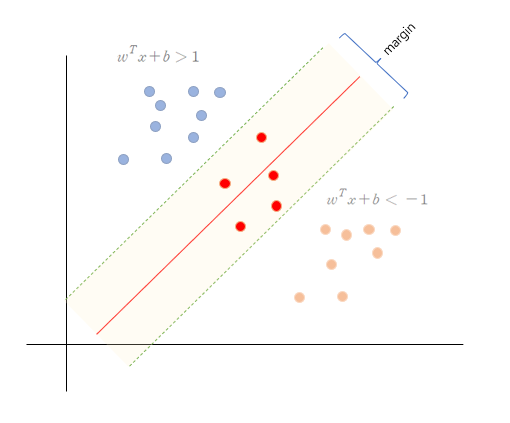

In [45]:
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
